In [3]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.7 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=b6a14ba665bf1ffeea7edd02b2385b817d4c5ee0fef0cd17a07a70f3c60de3b2
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
import wandb
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

Mounted at /gdrive


In [5]:
run = wandb.init(project="flowers")

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [6]:
config = wandb.config
wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]

In [7]:
dataset_path_train = "/gdrive/MyDrive/dataset/flower/train"
dataset_path_test = "/gdrive/MyDrive/dataset/flower/test"
width=height=224
idg=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    brightness_range=(0.8,1),
    zoom_range=0.1,
    # validation_split=0.1,
)

train_data=idg.flow_from_directory(
    dataset_path_train,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    subset='training',
)
val_data=idg.flow_from_directory(
    dataset_path_test,
    target_size=(width,height),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    subset='training',

)

Found 1020 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


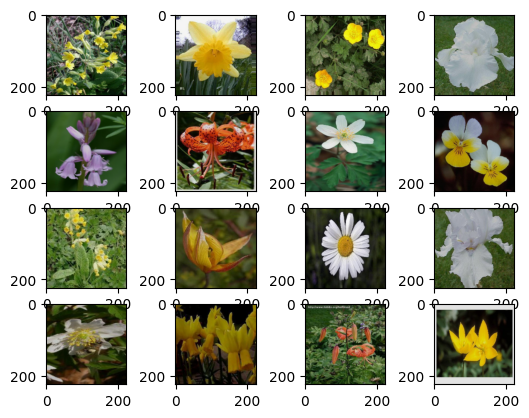

In [8]:
train_images = next(train_data)[0]
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(train_images[i])

In [9]:
model = tf.keras.applications.MobileNet(
    include_top=False,
    weights="imagenet",
    input_shape=(width,height,3),
    pooling ='avg'
    )

17225924/17225924 [==============================] - 0s 0us/step


In [10]:
for layer in model.layers[0:-4]:
  layer.trainable = False

In [11]:
my_model = models.Sequential([
    model,
    layers.Flatten(),
    # layers.Dense(512, activation="relu"),
    # layers.Dropout(0.2),
    # layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(17, activation="softmax"),
])

In [12]:
my_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint("/gdrive/MyDrive/best_model_flower",
                                            save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [13]:
history = my_model.fit(
    train_data,
    validation_data=val_data,
    epochs=30 ,
    callbacks=[stop_early, checkpoint,wandb_callbacks]
    )

Epoch 1/30
32/32 [==============================] - ETA: 0s - loss: 2.3512 - accuracy: 0.3363

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 440s 14s/step - loss: 2.3512 - accuracy: 0.3363 - val_loss: 2.3630 - val_accuracy: 0.3147
Epoch 2/30
32/32 [==============================] - ETA: 0s - loss: 0.8260 - accuracy: 0.7882

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 48s 2s/step - loss: 0.8260 - accuracy: 0.7882 - val_loss: 1.5913 - val_accuracy: 0.5353
Epoch 3/30
32/32 [==============================] - ETA: 0s - loss: 0.4432 - accuracy: 0.9049

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 47s 1s/step - loss: 0.4432 - accuracy: 0.9049 - val_loss: 1.0510 - val_accuracy: 0.6765
Epoch 4/30
32/32 [==============================] - ETA: 0s - loss: 0.2912 - accuracy: 0.9441

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 44s 1s/step - loss: 0.2912 - accuracy: 0.9441 - val_loss: 0.6504 - val_accuracy: 0.8029
Epoch 5/30
32/32 [==============================] - ETA: 0s - loss: 0.2318 - accuracy: 0.9569

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 44s 1s/step - loss: 0.2318 - accuracy: 0.9569 - val_loss: 0.4652 - val_accuracy: 0.8618
Epoch 6/30
32/32 [==============================] - ETA: 0s - loss: 0.1687 - accuracy: 0.9765

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 47s 1s/step - loss: 0.1687 - accuracy: 0.9765 - val_loss: 0.3828 - val_accuracy: 0.8912
Epoch 7/30
32/32 [==============================] - ETA: 0s - loss: 0.1372 - accuracy: 0.9755

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 44s 1s/step - loss: 0.1372 - accuracy: 0.9755 - val_loss: 0.3355 - val_accuracy: 0.9059
Epoch 8/30
32/32 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 0.9912

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 48s 2s/step - loss: 0.1041 - accuracy: 0.9912 - val_loss: 0.2994 - val_accuracy: 0.9088
Epoch 9/30
32/32 [==============================] - ETA: 0s - loss: 0.1011 - accuracy: 0.9853

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 44s 1s/step - loss: 0.1011 - accuracy: 0.9853 - val_loss: 0.2707 - val_accuracy: 0.9206
Epoch 10/30
32/32 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9931

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 44s 1s/step - loss: 0.0728 - accuracy: 0.9931 - val_loss: 0.2486 - val_accuracy: 0.9294
Epoch 11/30
32/32 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.9951

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 34s 1s/step - loss: 0.0659 - accuracy: 0.9951 - val_loss: 0.2516 - val_accuracy: 0.9265
Epoch 12/30
32/32 [==============================] - ETA: 0s - loss: 0.0610 - accuracy: 0.9912

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 44s 1s/step - loss: 0.0610 - accuracy: 0.9912 - val_loss: 0.2022 - val_accuracy: 0.9324
Epoch 13/30
32/32 [==============================] - ETA: 0s - loss: 0.0405 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 45s 1s/step - loss: 0.0405 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 0.9324
Epoch 14/30
32/32 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 35s 1s/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 0.2061 - val_accuracy: 0.9324
Epoch 15/30
32/32 [==============================] - ETA: 0s - loss: 0.0377 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 45s 1s/step - loss: 0.0377 - accuracy: 1.0000 - val_loss: 0.1989 - val_accuracy: 0.9412
Epoch 16/30
32/32 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9980

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 34s 1s/step - loss: 0.0351 - accuracy: 0.9980 - val_loss: 0.2121 - val_accuracy: 0.9353
Epoch 17/30
32/32 [==============================] - ETA: 0s - loss: 0.0320 - accuracy: 0.9990

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 44s 1s/step - loss: 0.0320 - accuracy: 0.9990 - val_loss: 0.1917 - val_accuracy: 0.9441
Epoch 18/30
32/32 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9990

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 43s 1s/step - loss: 0.0306 - accuracy: 0.9990 - val_loss: 0.1859 - val_accuracy: 0.9382
Epoch 19/30
32/32 [==============================] - ETA: 0s - loss: 0.0306 - accuracy: 0.9971

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 34s 1s/step - loss: 0.0306 - accuracy: 0.9971 - val_loss: 0.1922 - val_accuracy: 0.9324
Epoch 20/30
32/32 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9990

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 45s 1s/step - loss: 0.0274 - accuracy: 0.9990 - val_loss: 0.1852 - val_accuracy: 0.9500
Epoch 21/30
32/32 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 46s 1s/step - loss: 0.0211 - accuracy: 1.0000 - val_loss: 0.1785 - val_accuracy: 0.9441
Epoch 22/30
32/32 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 36s 1s/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.1883 - val_accuracy: 0.9500
Epoch 23/30
32/32 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9990

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 45s 1s/step - loss: 0.0196 - accuracy: 0.9990 - val_loss: 0.1761 - val_accuracy: 0.9529
Epoch 24/30
32/32 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 34s 1s/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.1796 - val_accuracy: 0.9471
Epoch 25/30
32/32 [==============================] - ETA: 0s - loss: 0.0160 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 35s 1s/step - loss: 0.0160 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9529
Epoch 26/30
32/32 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 46s 1s/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1686 - val_accuracy: 0.9382
Epoch 27/30
32/32 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 33s 1s/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9353
Epoch 28/30
32/32 [==============================] - ETA: 0s - loss: 0.0123 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 36s 1s/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.1926 - val_accuracy: 0.9412
Epoch 29/30
32/32 [==============================] - ETA: 0s - loss: 0.0117 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 36s 1s/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9471
Epoch 30/30
32/32 [==============================] - ETA: 0s - loss: 0.0140 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 36s 1s/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.1828 - val_accuracy: 0.9382


In [16]:
loaded_model = tf.keras.models.load_model('/gdrive/MyDrive/best_model_flower')
loaded_model.evaluate(val_data)

11/11 [==============================] - 6s 476ms/step - loss: 0.1679 - accuracy: 0.9529


[0.167851060628891, 0.9529411792755127]

In [15]:
loaded_model = tf.keras.models.load_model('/gdrive/MyDrive/best_model_flower')
new_history = loaded_model.fit(train_data, validation_data=val_data, epochs=10,
                    callbacks=[stop_early, checkpoint,wandb_callbacks],
                    )

Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 0.0158 - accuracy: 0.9990

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 36s 1s/step - loss: 0.0158 - accuracy: 0.9990 - val_loss: 0.1940 - val_accuracy: 0.9353
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9990

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 35s 1s/step - loss: 0.0115 - accuracy: 0.9990 - val_loss: 0.2150 - val_accuracy: 0.9353
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.0100 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 33s 1s/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.2317 - val_accuracy: 0.9265
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 34s 1s/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.2244 - val_accuracy: 0.9353
Epoch 5/10
32/32 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 34s 1s/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.2264 - val_accuracy: 0.9324
Epoch 6/10
32/32 [==============================] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 33s 1s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1789 - val_accuracy: 0.9471
Epoch 7/10
32/32 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 43s 1s/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.1670 - val_accuracy: 0.9471
Epoch 8/10
32/32 [==============================] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 33s 1s/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.1726 - val_accuracy: 0.9412
Epoch 9/10
32/32 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 34s 1s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.1733 - val_accuracy: 0.9471
Epoch 10/10
32/32 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000

wandb: Adding directory to artifact (./models)... Done. 0.1s


32/32 [==============================] - 38s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1818 - val_accuracy: 0.9529


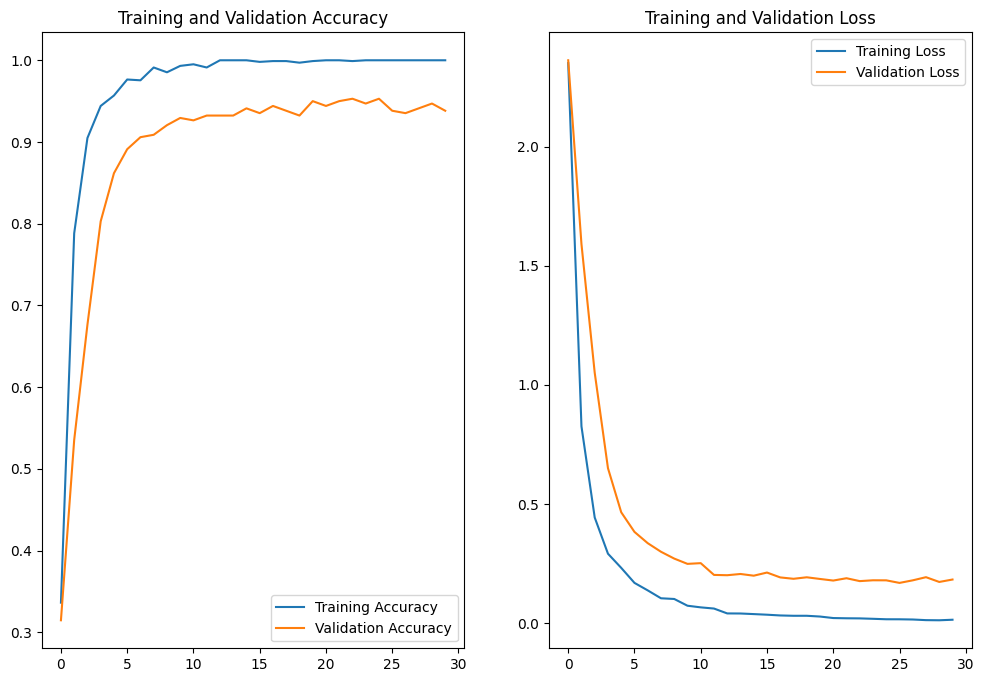

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()